In [27]:
import pandas as pd
import numpy as np
data = pd.read_csv('Mobile-Price-Prediction-cleaned_data.csv')
data.head(5)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB


In [29]:
X = data.iloc[:, :-1].values
X.shape

(807, 7)

In [30]:
Y = data.iloc[:, -1].values
Y.shape

(807,)

In [31]:
train_ratio = 0.8
xtrain = X[:int(train_ratio * X.shape[0])]
ytrain = Y[:int(train_ratio * Y.shape[0])]
xtest = X[int(train_ratio * X.shape[0]):]
ytest = Y[int(train_ratio * Y.shape[0]):]

In [32]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((645, 7), (645,), (162, 7), (162,))

# 1. Closed Form Solution
### W = (XTX)-1 * XT * Y

In [33]:
class LinearRegressionClosedForm:
    def __init__(self):
        W = None
        pass

    def fit(self, X, Y):
        X = np.insert(X, 0, 1, axis=1)
        print(X)
        xtranspose = X.T
        self.W = np.linalg.inv(xtranspose.dot(X)).dot(xtranspose).dot(Y)

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return np.maximum(0,X.dot(self.W))

In [34]:
model = LinearRegressionClosedForm()
model.fit(xtrain, ytrain)

[[1.0e+00 4.3e+00 4.0e+00 ... 4.8e+01 1.3e+01 4.0e+03]
 [1.0e+00 3.4e+00 6.0e+00 ... 4.8e+01 1.2e+01 4.0e+03]
 [1.0e+00 4.3e+00 4.0e+00 ... 6.4e+01 1.6e+01 4.0e+03]
 ...
 [1.0e+00 4.5e+00 8.0e+00 ... 4.8e+01 1.2e+01 4.7e+03]
 [1.0e+00 3.9e+00 6.0e+00 ... 6.4e+01 2.2e+01 3.5e+03]
 [1.0e+00 4.3e+00 4.0e+00 ... 4.8e+01 8.0e+00 3.8e+03]]


In [35]:
model.W

array([-9.91651511e+04,  2.47552690e+04,  2.19413959e+03,  8.96894546e+01,
        1.45222701e+01, -3.71867654e+02,  2.15300584e+02,  2.50618183e+00])

In [36]:
ypred = model.predict(xtest)

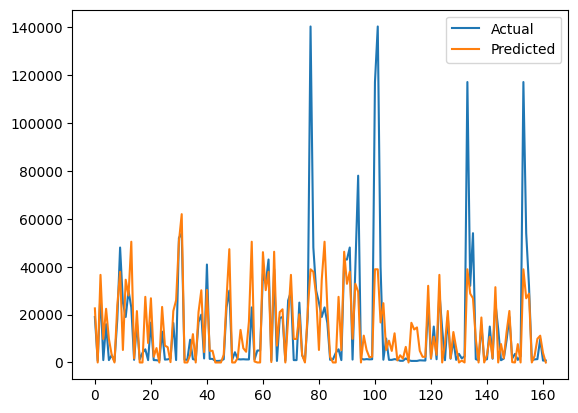

In [37]:
import matplotlib.pyplot as plt
plt.plot(ytest, label='Actual')
plt.plot(ypred, label='Predicted')
plt.legend()
plt.show()

# Gradient Descent

In [38]:
class LinearRegressionGradientDescent:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.W = None

    def fit(self, X, Y):
        X = np.insert(X, 0, 1, axis=1)
        self.W = np.random.random(X.shape[1])
        print(self.W)
        for i in range(self.iterations):
            Ypred = X.dot(self.W)
            error = Ypred - Y
            gradient = (error.dot(X))/X.shape[0]
            self.W = self.W - self.learning_rate * gradient

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return np.maximum(0,X.dot(self.W))

In [39]:
modelgd = LinearRegressionGradientDescent(learning_rate=0.001, iterations=30)
modelgd.fit(xtrain, ytrain)
ypred = modelgd.predict(xtest)

[0.625835   0.90558051 0.58169706 0.37030536 0.88933636 0.83578065
 0.35273224 0.02708687]


## Why non-normalized data may not work with GD
1. Different Scales: If your features have vastly different scales (e.g., one feature ranges from 1 to 10, while another ranges from 1000 to 10000), the cost function will have steep contours in one dimension and shallow in another. This can cause the gradient descent algorithm to oscillate and take a very long time to converge, or even fail to converge at all.

2. Learning Rate Sensitivity: Gradient descent updates parameters in the direction of the steepest descent. If one feature dominates due to its larger scale, the updates will be biased towards that feature, potentially leading to suboptimal solutions.

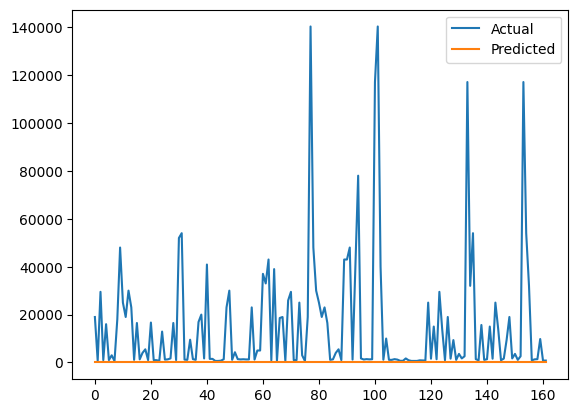

In [40]:
plt.plot(ytest, label='Actual')
plt.plot(ypred, label='Predicted')
plt.legend()
plt.show()

# With L2 Regularization

In [41]:
class LinearRegressionL2ClosedForm:
    def __init__(self):
        W = None
        pass

    def fit(self, X, Y, lambda_val):
        X = np.insert(X, 0, 1, axis=1)
        xtranspose = X.T
        self.W = np.linalg.inv(xtranspose.dot(X) + lambda_val * np.identity(X.shape[1])).dot(xtranspose).dot(Y)

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return np.maximum(0,X.dot(self.W))

In [42]:
model = LinearRegressionL2ClosedForm()
model.fit(xtrain, ytrain, 0.5)
ypred = model.predict(xtest)

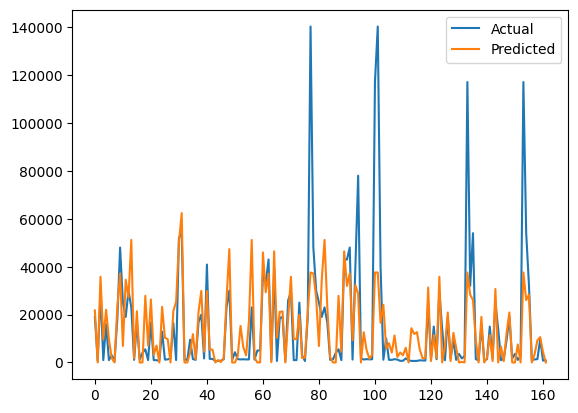

In [43]:
plt.plot(ytest, label='Actual')
plt.plot(ypred, label='Predicted')
plt.legend()   
plt.show()

## GD L2Norm

In [44]:
class LinearRegressionL2GradientDescent:
    def __init__(self, learning_rate, iterations, norm = 0):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.W = None
        self.norm = norm

    def feature_normalize(self, X):
        mu = np.mean(X, axis=0)
        sigma = np.std(X, axis=0)
        X_norm = (X - mu) / sigma
        return X_norm
    
    def fit(self, X, Y, lambda_val):
        if self.norm:
            X = self.feature_normalize(X)
            
        X = np.insert(X, 0, 1, axis=1)
        self.W = np.random.random(X.shape[1])
        for i in range(self.iterations):
            Ypred = X.dot(self.W)
            error = Ypred - Y
            gradient = (error.dot(X))/X.shape[0] + lambda_val * self.W
            self.W = self.W - self.learning_rate * gradient

    def predict(self, X):
        if self.norm:
            X = self.feature_normalize(X)
            
        X = np.insert(X, 0, 1, axis=1)
        return np.maximum(0,X.dot(self.W))

In [45]:
model_withoutNorm = LinearRegressionL2GradientDescent(learning_rate=0.001, iterations=30)
model_withoutNorm.fit(xtrain, ytrain, 0.5)
ypred = model_withoutNorm.predict(xtest)

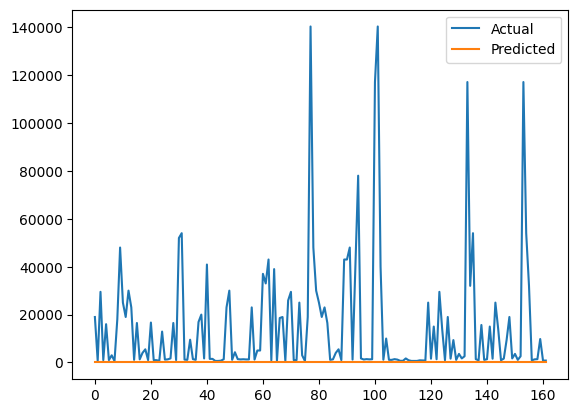

In [46]:
plt.plot(ytest, label='Actual')
plt.plot(ypred, label='Predicted')
plt.legend()
plt.show()

## With Normalization

In [47]:
model_withNorm = LinearRegressionL2GradientDescent(learning_rate=0.01, iterations=1000,norm = 1)
model_withNorm.fit(xtrain, ytrain, 0.3)
ypred = model_withNorm.predict(xtest)

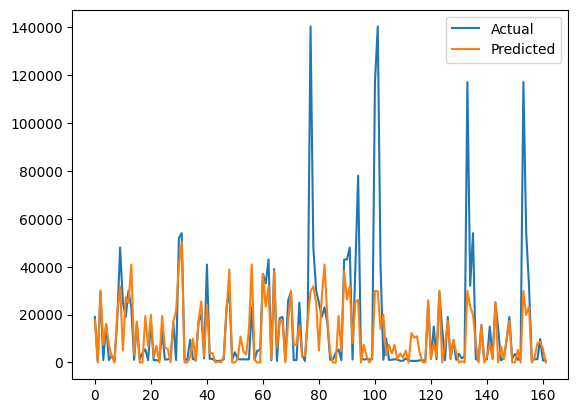

In [48]:
plt.plot(ytest, label='Actual')
plt.plot(ypred, label='Predicted')
plt.legend()
plt.show()

## Plots with different lambda values

C:\Users\asus\AppData\Local\Temp\ipykernel_21416\739581554.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 500x400 with 0 Axes>

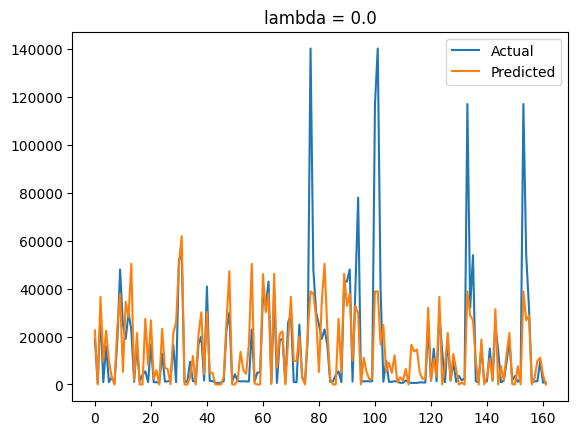

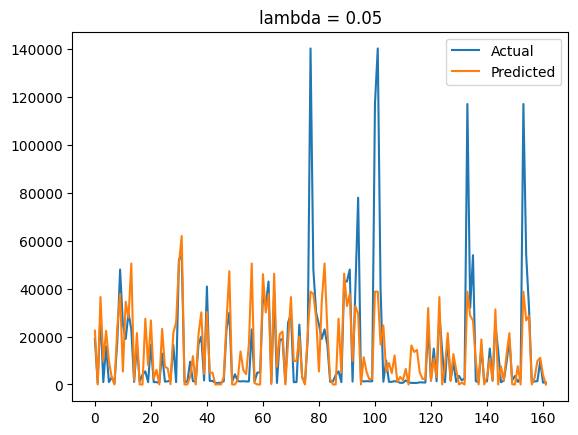

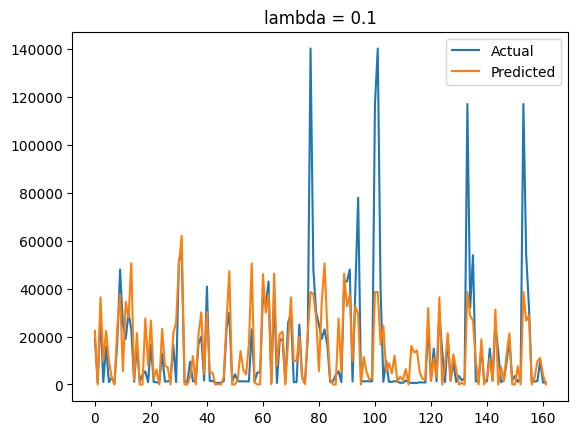

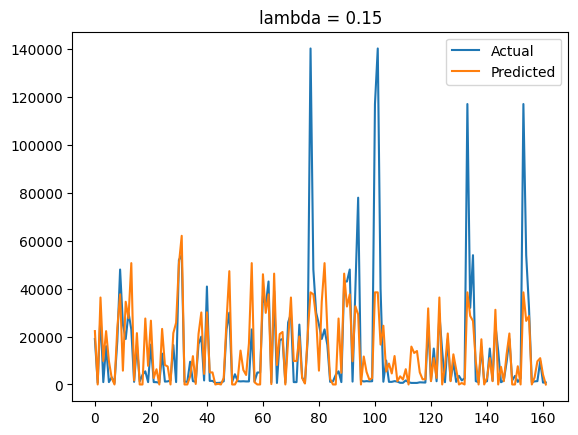

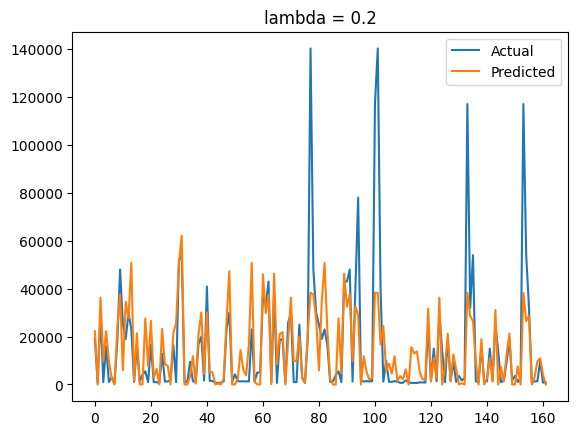

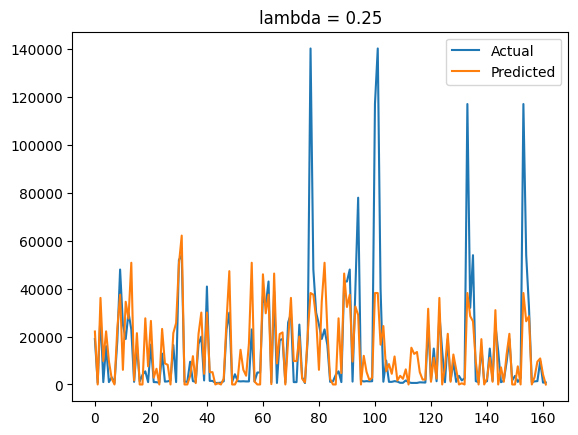

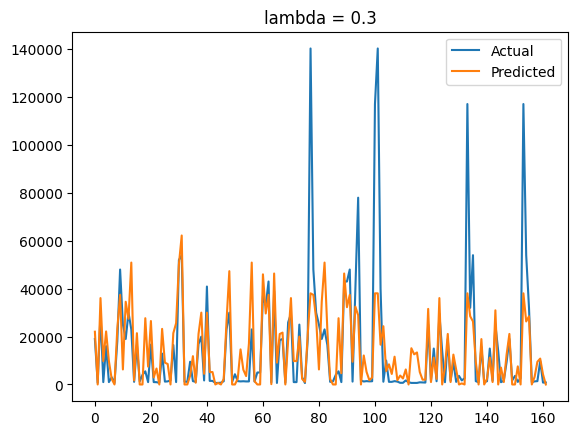

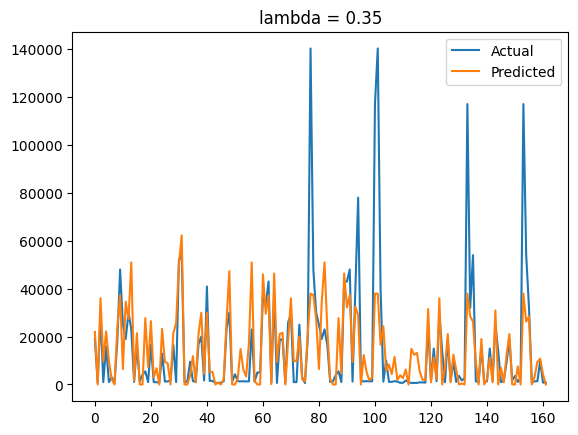

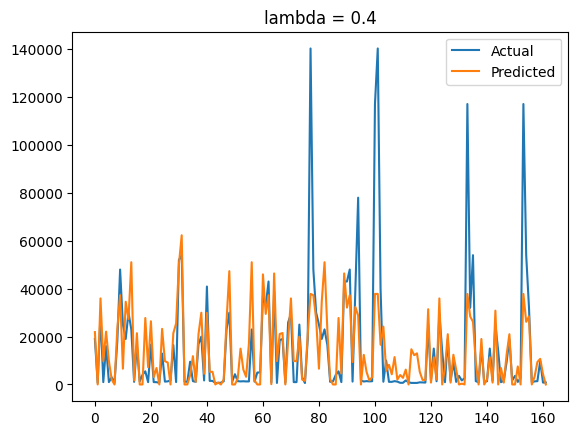

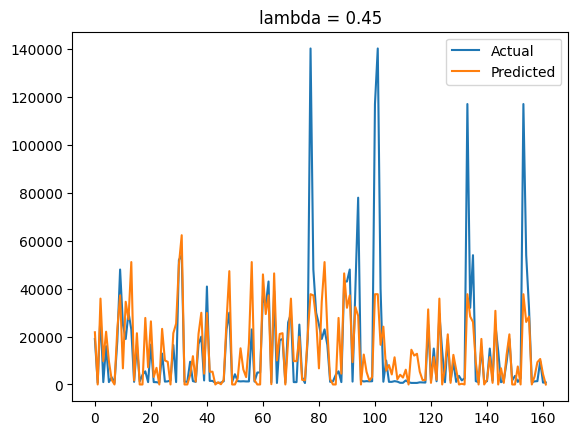

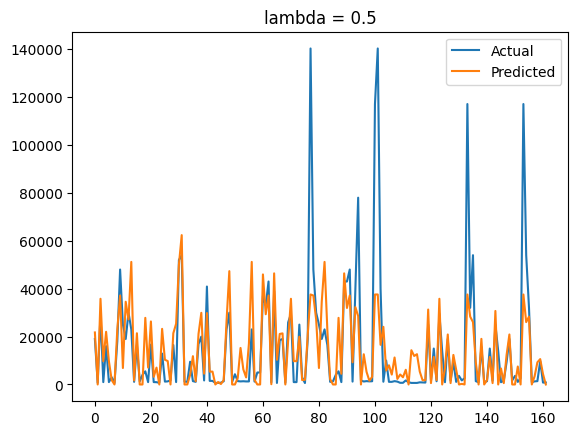

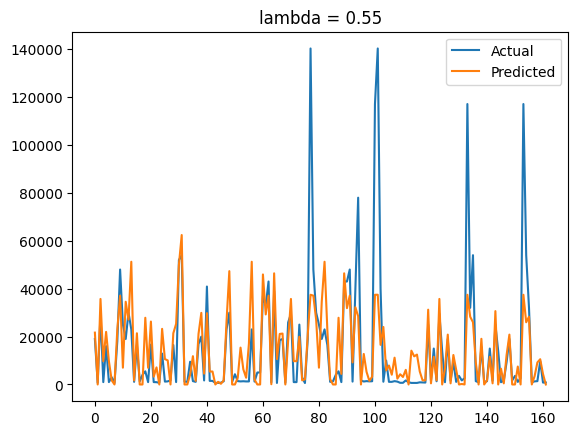

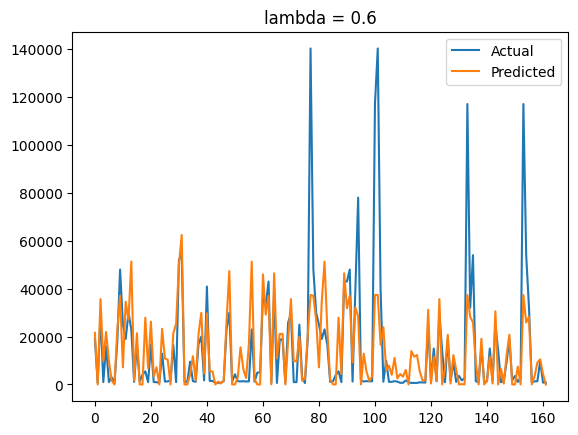

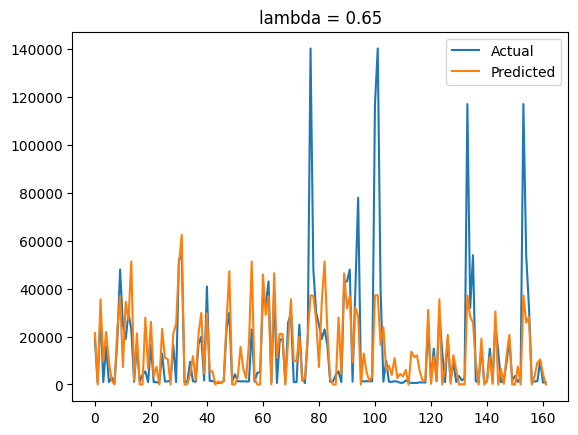

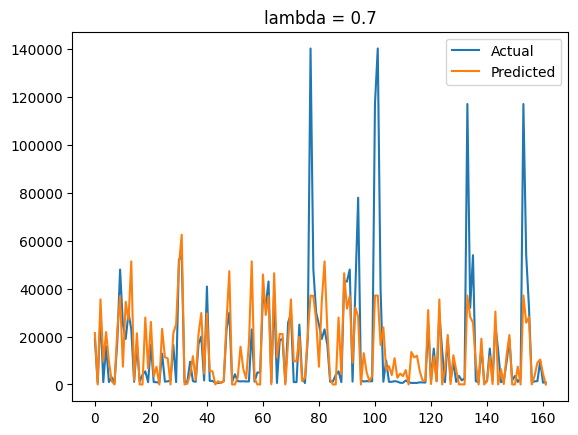

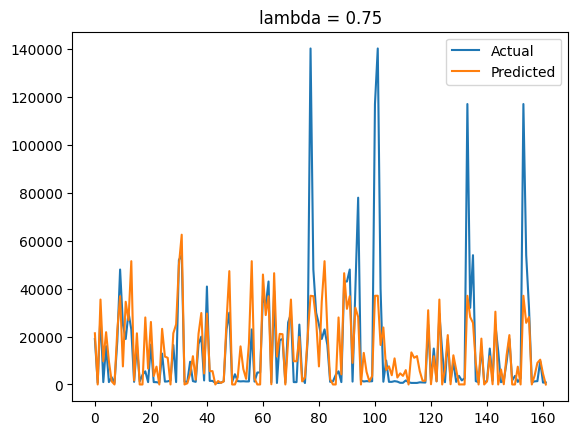

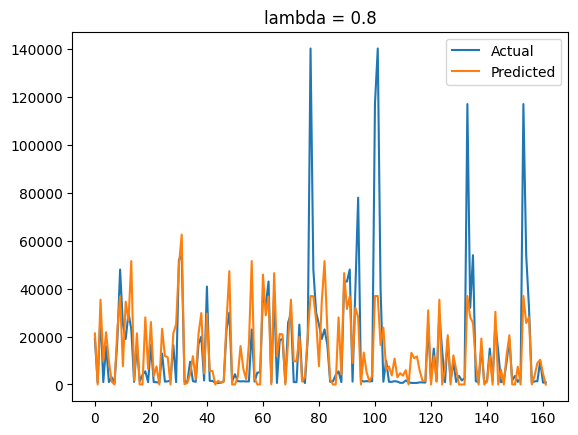

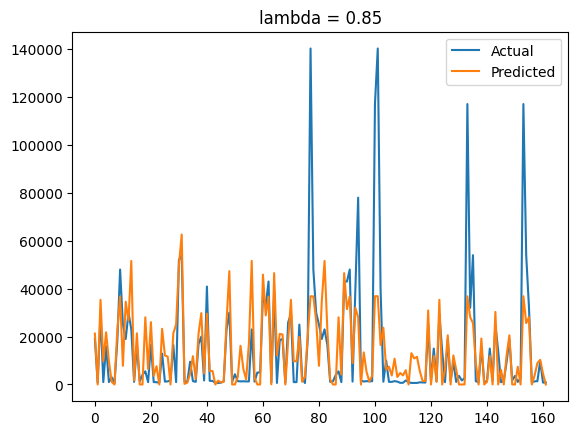

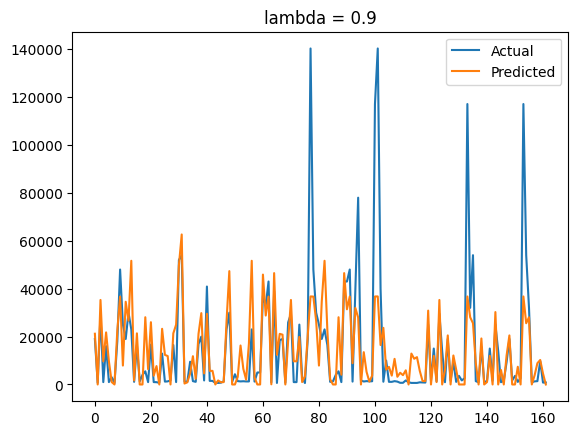

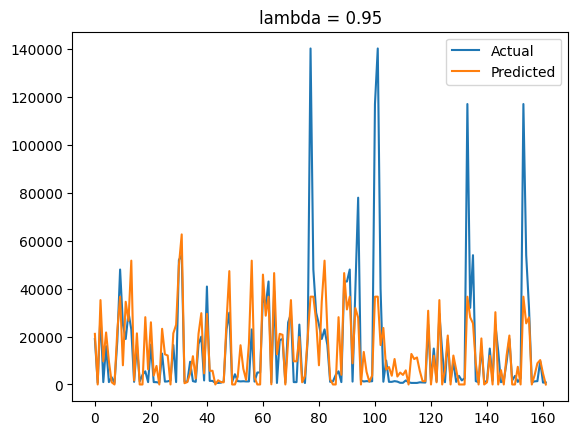

In [49]:
ypredicted = []

for lambda_val in np.arange(0, 1, 0.05):
    model = LinearRegressionL2ClosedForm()
    model.fit(xtrain, ytrain, lambda_val)
    ypredicted.append(model.predict(xtest))
    
plt.figure(figsize=(5, 4))
for i in range(len(ypredicted)):
    plt.figure()
    plt.plot(ytest, label='Actual')
    plt.plot(ypredicted[i], label='Predicted')
    plt.title(f"lambda = {np.round(i*0.05, 2)}")
    plt.legend() 
plt.show()

# Weights

In [50]:
w1 = model_withoutNorm.W
w2 = model_withNorm.W

1. The weight values from a regression model with L2 regularization indicate the relative importance of each feature in predicting the target variable.

### Before Reg
The weights are extremely large, indicating high correlation among the features/ overfitting of the model to the training data. The magnitude difference between weights suggests that some features might have been disproportionately influencing the model.

In [51]:
w1

array([-1.12490818e+119, -4.68358252e+119, -6.72388210e+119,
       -7.90333855e+120, -6.59241474e+119, -5.34916467e+120,
       -9.76530826e+119, -4.00252609e+122])

### After Reg
The weights have been reduced to much smaller values, due to the L2 penalty

In [52]:
w2

array([10777.89056946,  7019.39053827,  3691.56310617,  4417.68003842,
         154.42642228, -3154.37826315,   697.72374102,  2602.61860529])